In [1]:
%pylab inline
import calcium_spikes as cs
import numpy as np
import matplotlib.pyplot as plt

/Users/Torben/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/Torben/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Walkthrough to gradient boosting calcium --> spike prediction code

In [2]:
data_dir = '/Users/Torben/Documents/cai-3_dataset/data/'
all_dat = cs.data_organization.load_data(data_dir)

all_calcium = all_dat[0]
all_spikes = all_dat[1]
all_loc= all_dat[2]
all_bs = all_dat[3]
all_ind = all_dat[4]
all_cell_ind = all_dat[5]

22 cells loaded


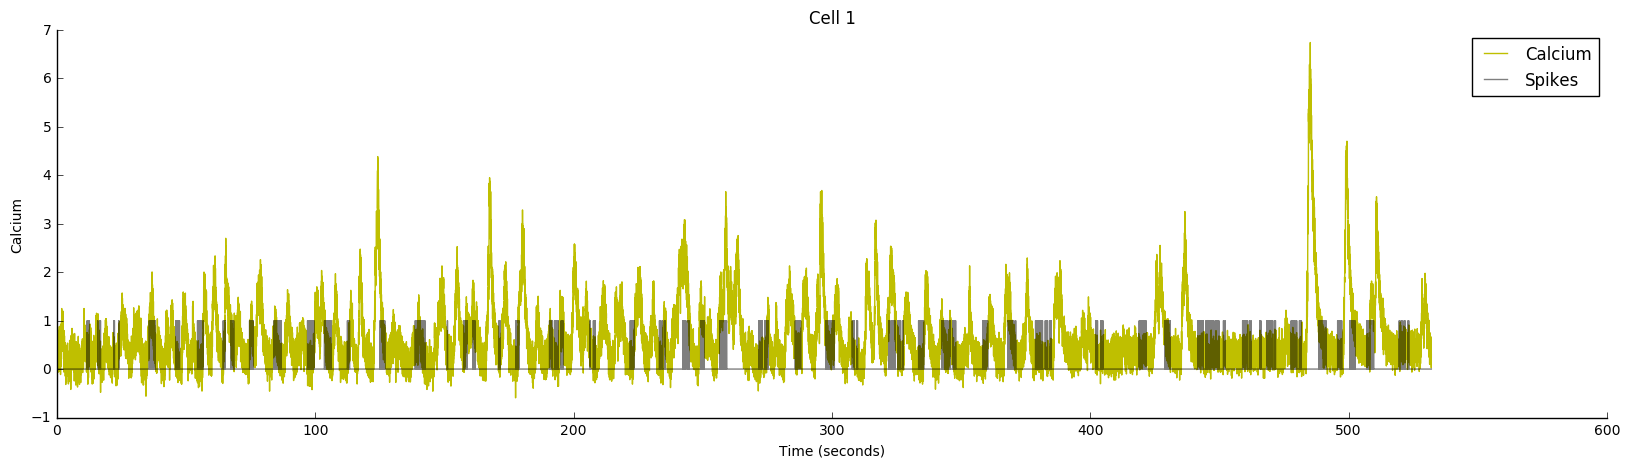

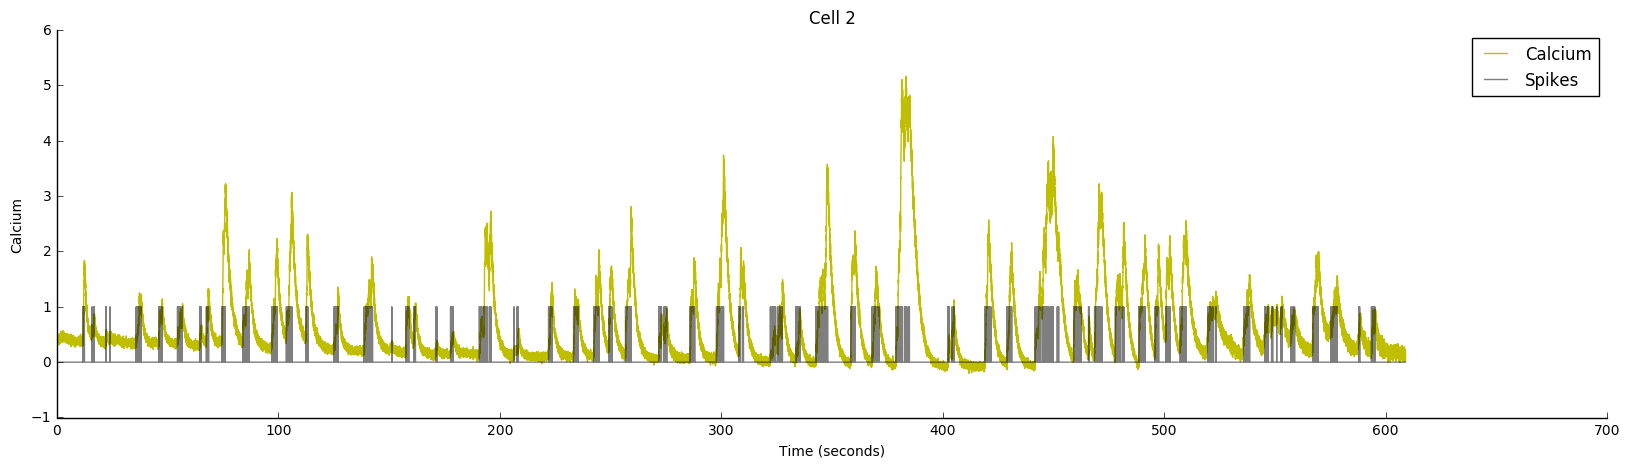

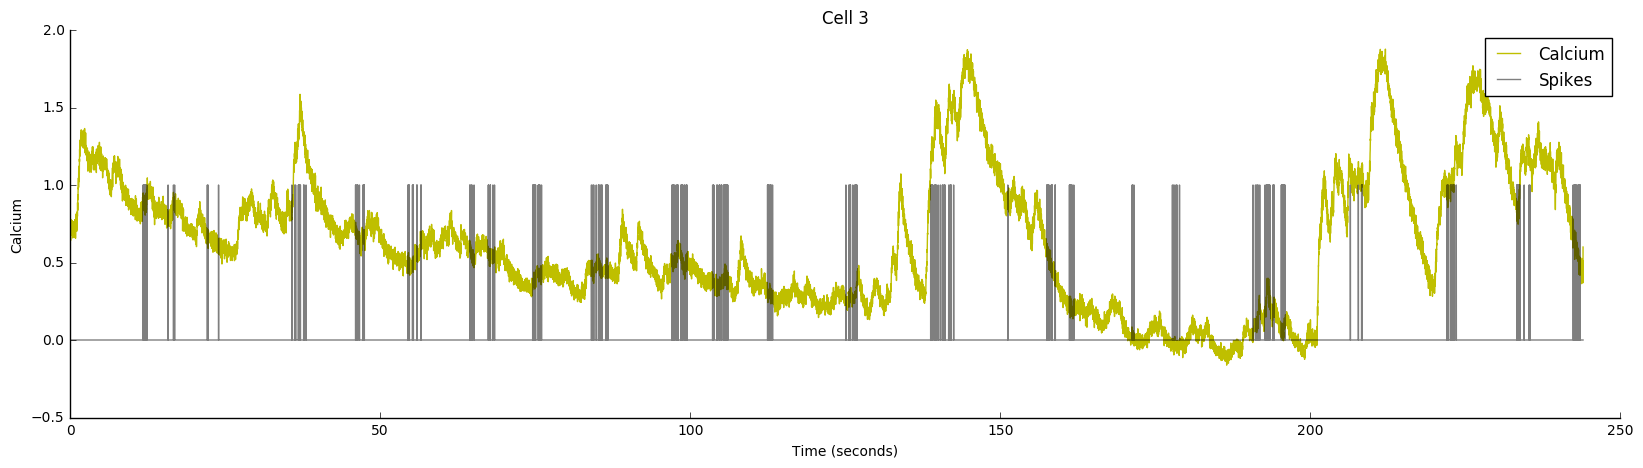

In [12]:
### What data looks like
this_cell=0
fig1 = cs.plotting_functions.plot_dat_seg(all_calcium[all_cell_ind==this_cell],spikes=all_spikes[all_cell_ind==1],inds=[0,len(all_calcium[all_cell_ind==this_cell])], fig_title='Cell 1')
this_cell=1
fig2 = cs.plotting_functions.plot_dat_seg(all_calcium[all_cell_ind==this_cell],spikes=all_spikes[all_cell_ind==1],inds=[0,len(all_calcium[all_cell_ind==this_cell])], fig_title='Cell 2')
this_cell=2
fig2 = cs.plotting_functions.plot_dat_seg(all_calcium[all_cell_ind==this_cell],spikes=all_spikes[all_cell_ind==1],inds=[0,len(all_calcium[all_cell_ind==this_cell])], fig_title='Cell 3')

In [5]:
complete_feature_mat = cs.data_organization.build_feature_mat(all_calcium, all_loc, all_ind, all_bs)
X_train,X_test,y_train,y_test = cs.data_organization.build_train_test_sets(complete_feature_mat,all_spikes, ceil_spikes=True, subsample=None, test_size=.2)

In [6]:
X_train.shape

(624865, 62)

In [7]:
# gotten from brute force optimization
best_params = {'objective': "binary:logistic",
               'eval_metric':"error",
                'eta': 1,
                'alpha' : 0.1,
                'lambda':0.1,
                'gamma':0, 
                'max_depth': 5,
                'seed': 16,
                'silent': 1,
                'missing': '-999.0',
                'colsample_bytree':.5
                }

Yr,Yt,model = cs.boosting.binary_booster(X_train,X_test,y_train,y_test,params=best_params)

In [8]:
train_metrics, test_metrics, [train_scores, test_scores] = cs.output_analysis.calculate_accuracy_metrics(y_train,y_test, Yr, Yt)

Train correlation: 0.341
Test correlation: 0.055
Training Accuracy:
0 spikes: 603700 True Positive (0.9973%). 16004 False Positive (0.8199%). 603700 True Negative (0.9661%). 1646 False Negative (0.0843%). 605346 Total. 
1 spikes: 3515 True Positive (0.1801%). 1646 False Positive (0.0027%). 603700 True Negative (0.9661%). 1646 False Negative (0.0027%). 19519 Total. 
Testing Accuracy:
0 spikes: 150269 True Positive (0.9923%). 4603 False Positive (0.9626%). 150269 True Negative (0.9619%). 1166 False Negative (0.2438%). 151435 Total. 
1 spikes: 179 True Positive (0.0374%). 1166 False Positive (0.0077%). 150269 True Negative (0.9619%). 1166 False Negative (0.0077%). 4782 Total. 


In [ ]:
train_measures,test_measures = cs.output_analysis.calculate_all_accuracy(y_train, y_test, Yr, Yt)


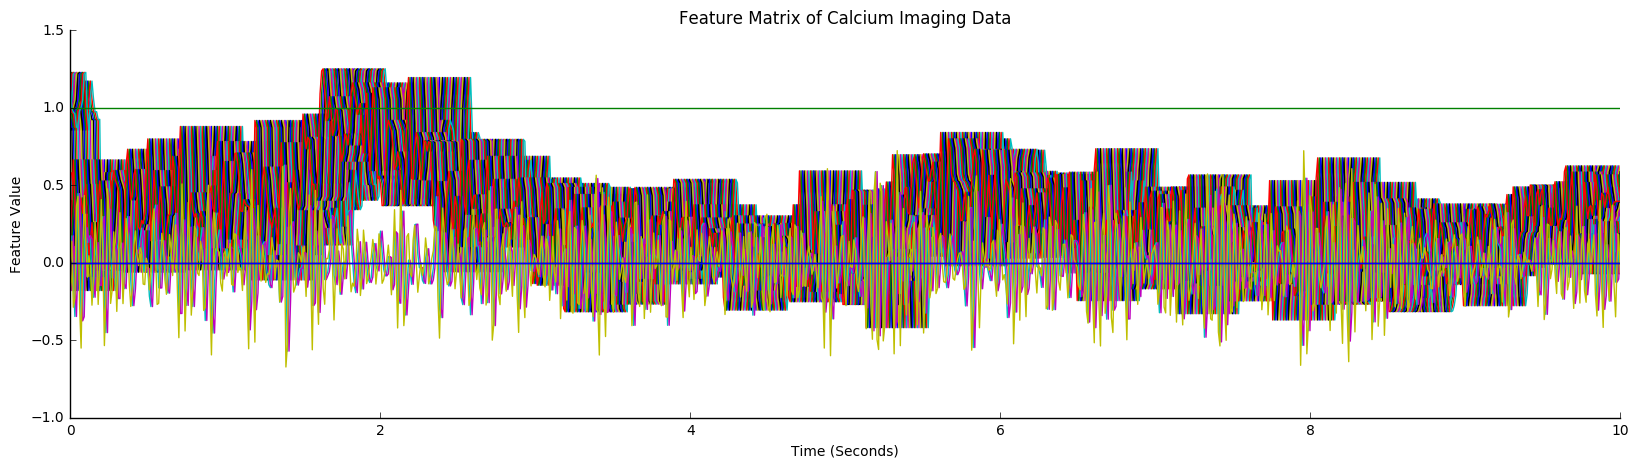

In [8]:
cs.plotting_functions.plot_feature_mat(complete_feature_mat);

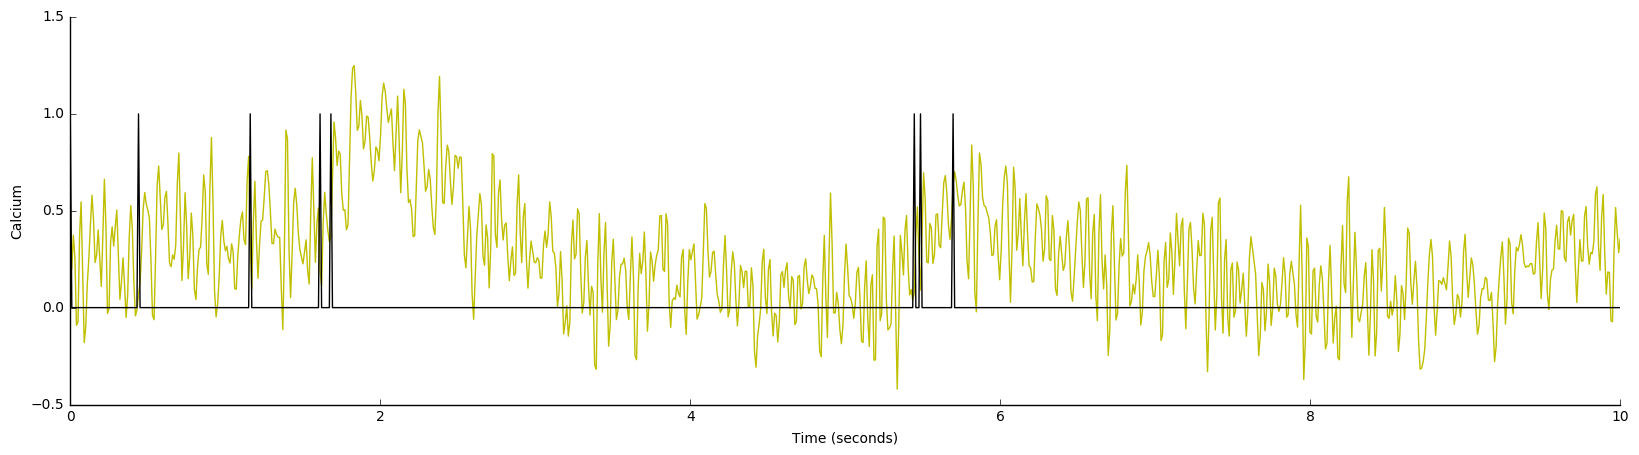

In [10]:
cs.plotting_functions.plot_dat_seg(all_calcium,spikes=all_spikes);

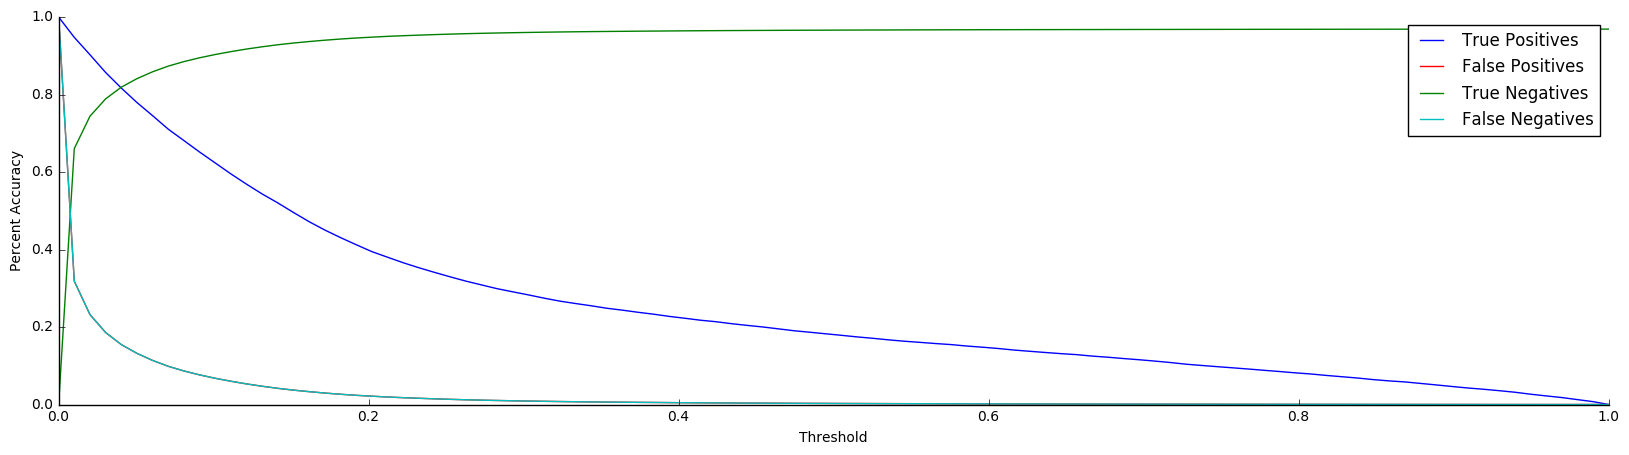

In [11]:
cs.plotting_functions.plot_all_accuracies(train_measures);

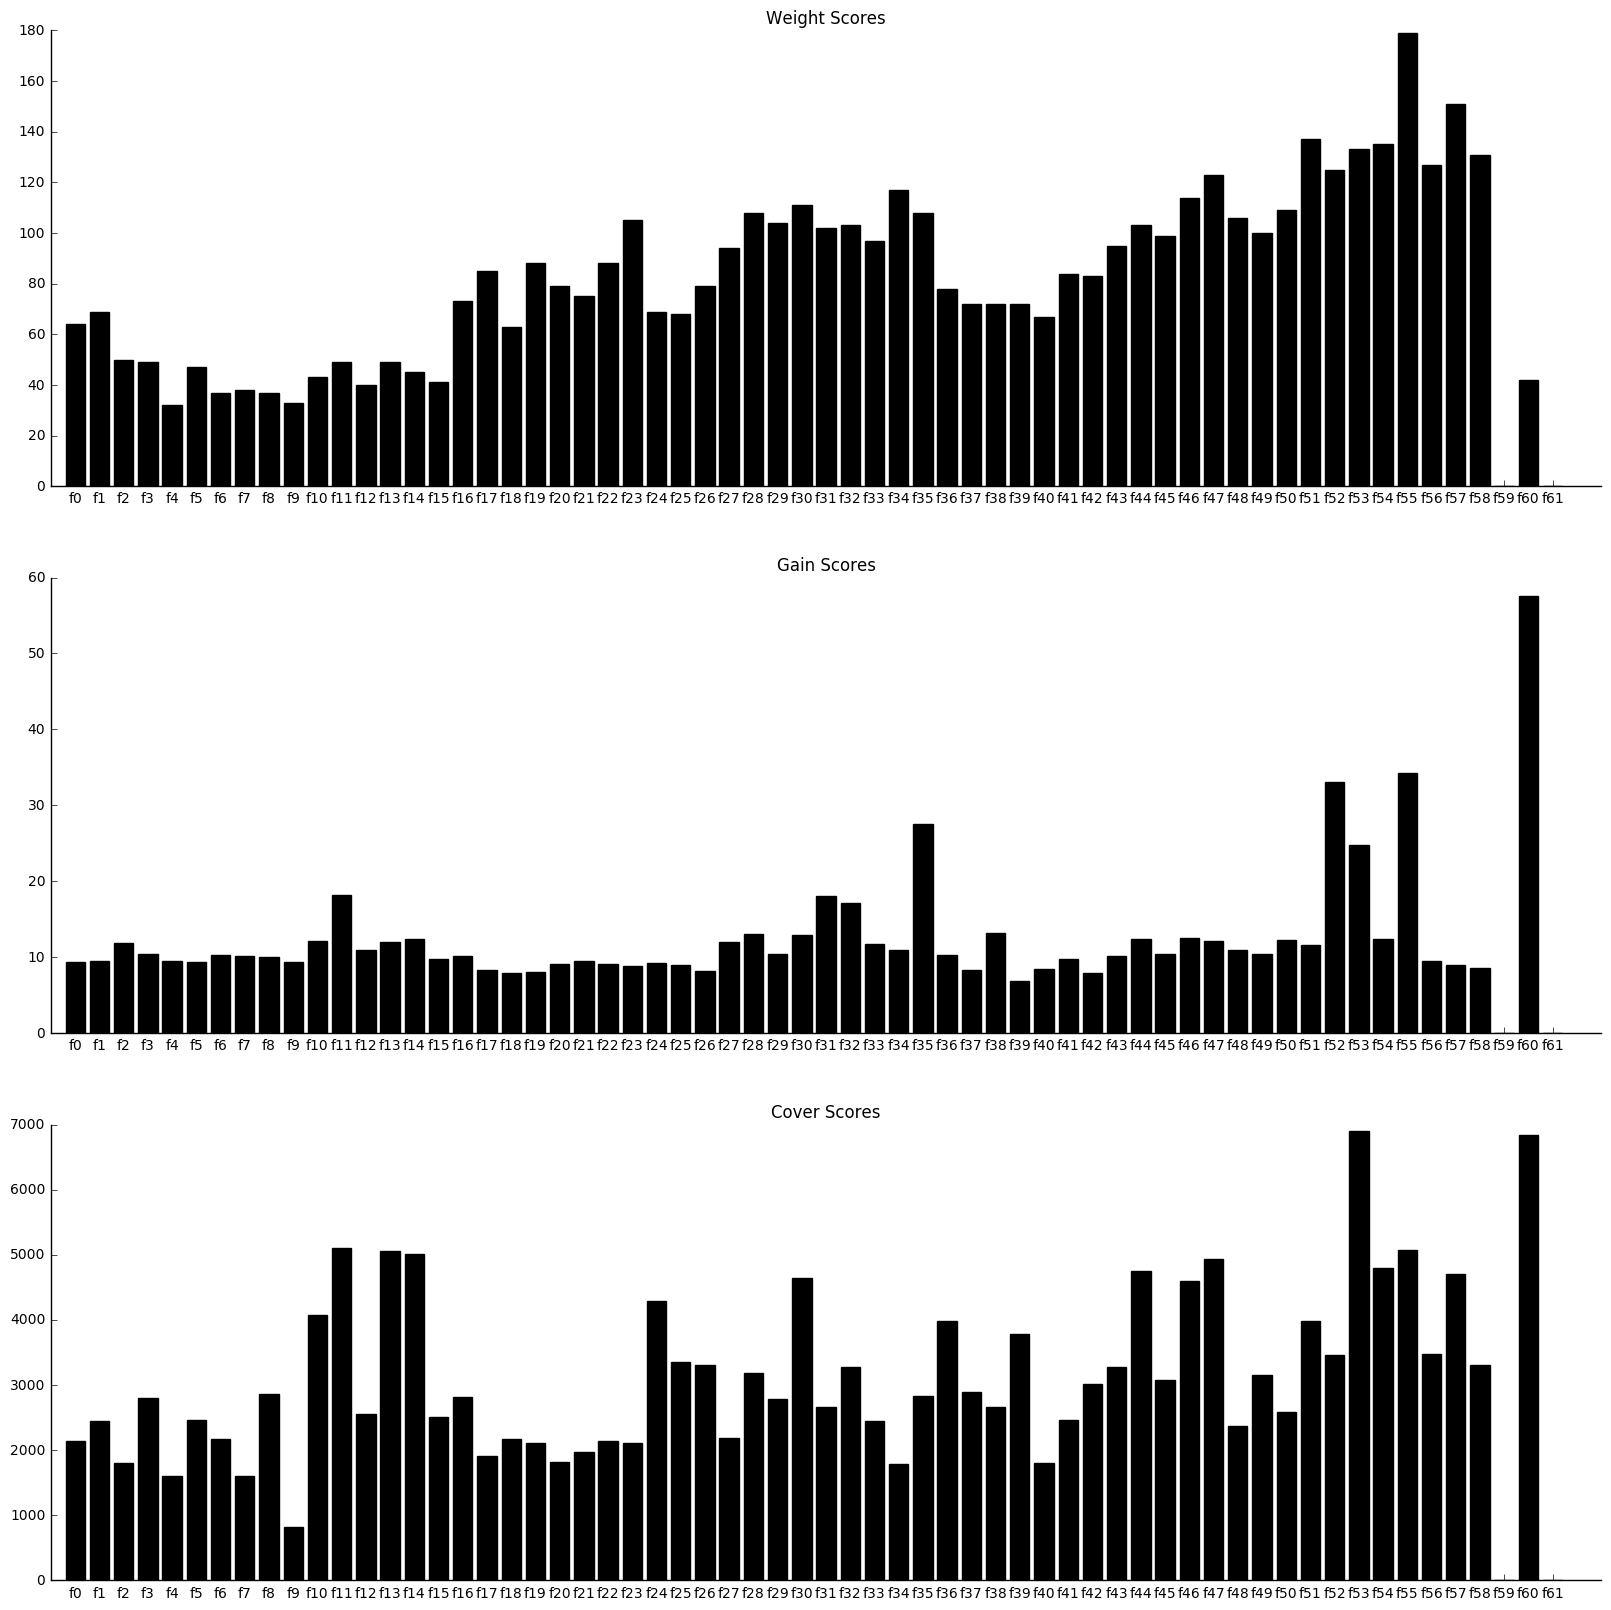

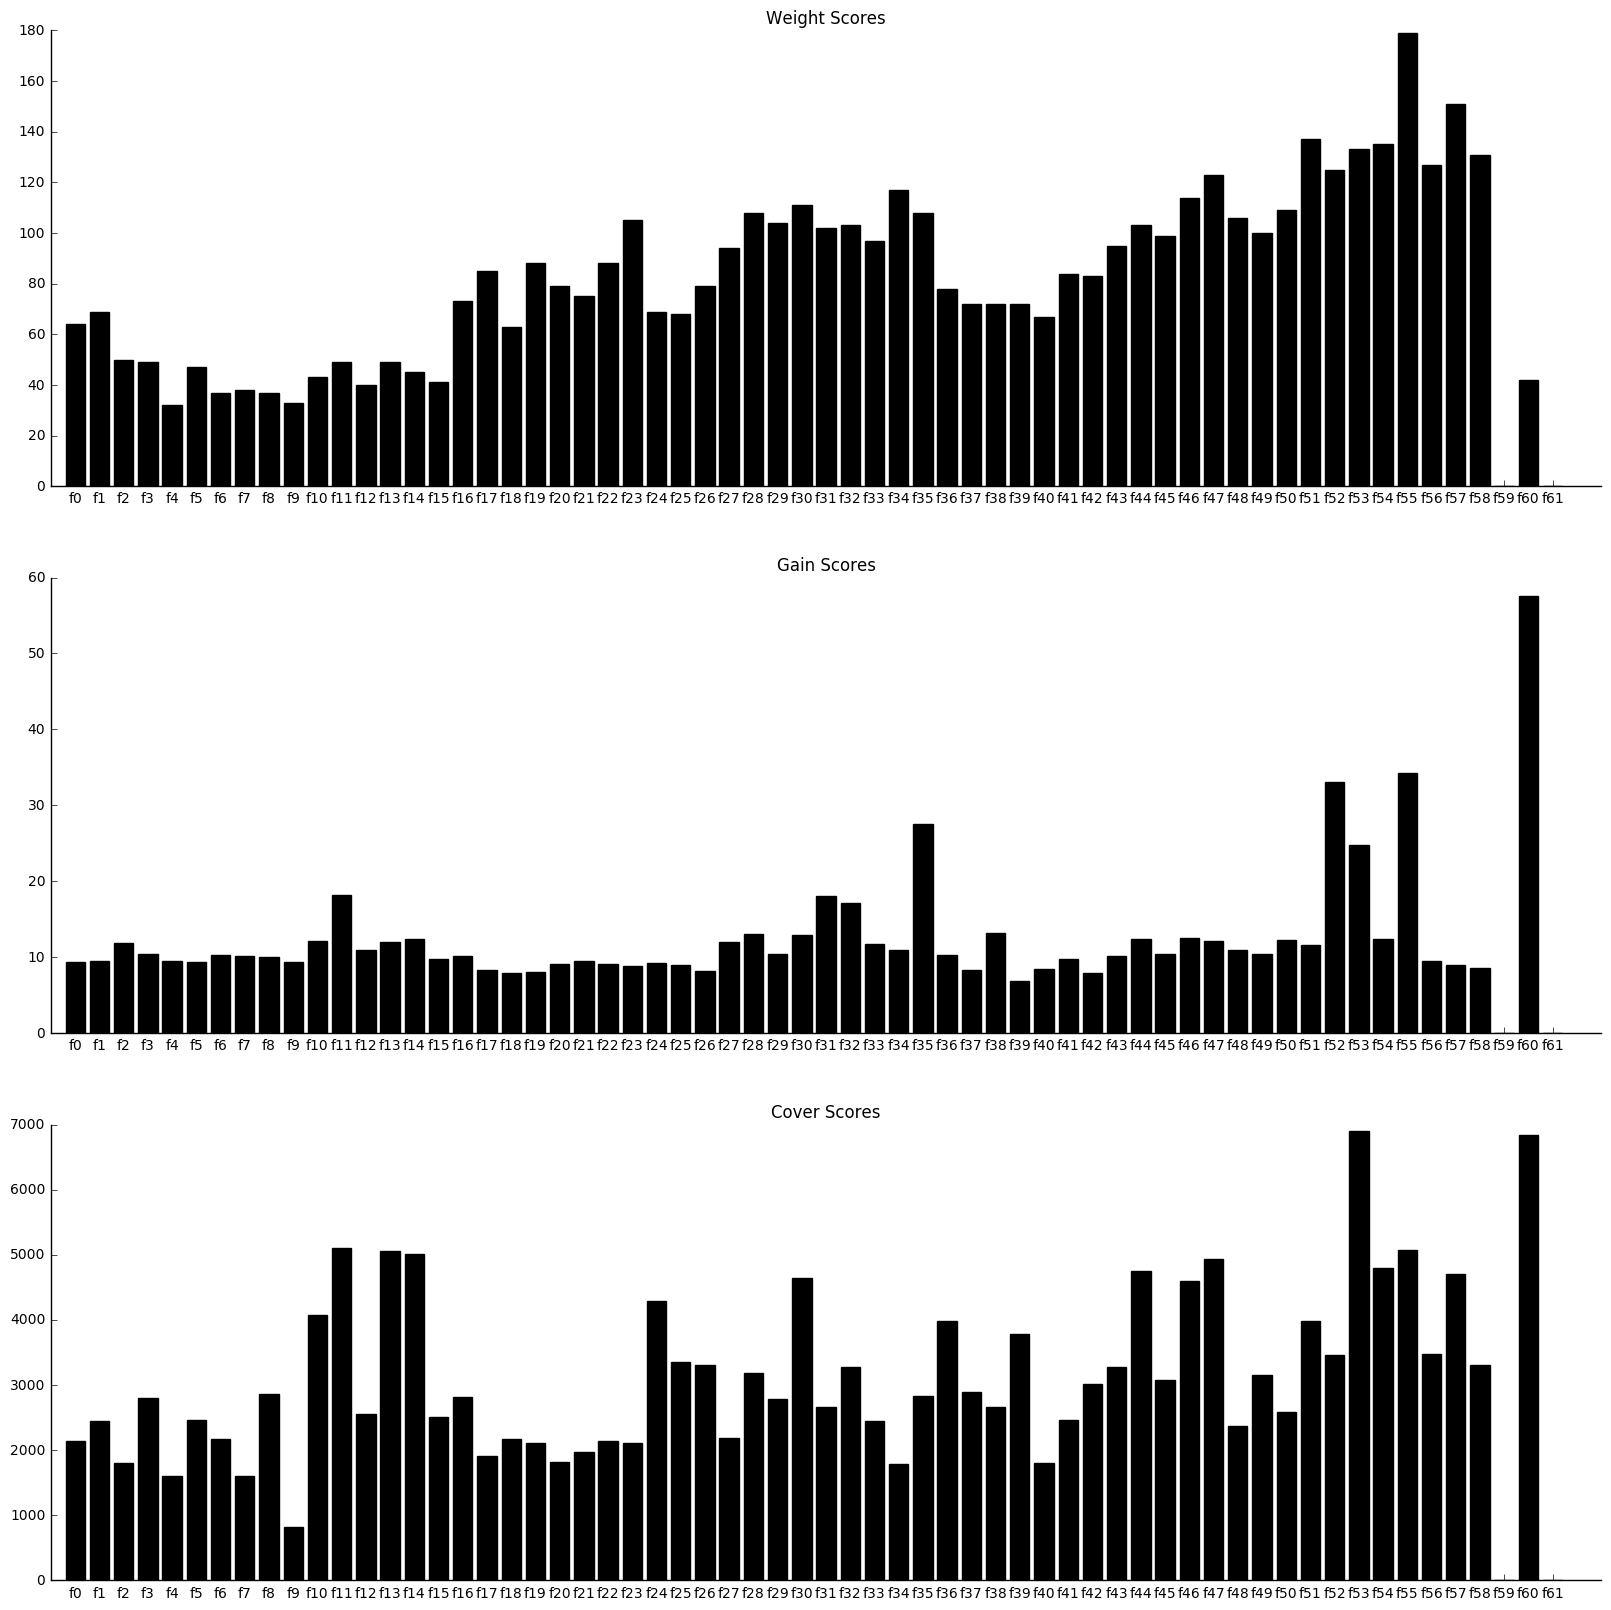

In [13]:
cs.plotting_functions.plot_feature_importance(model)

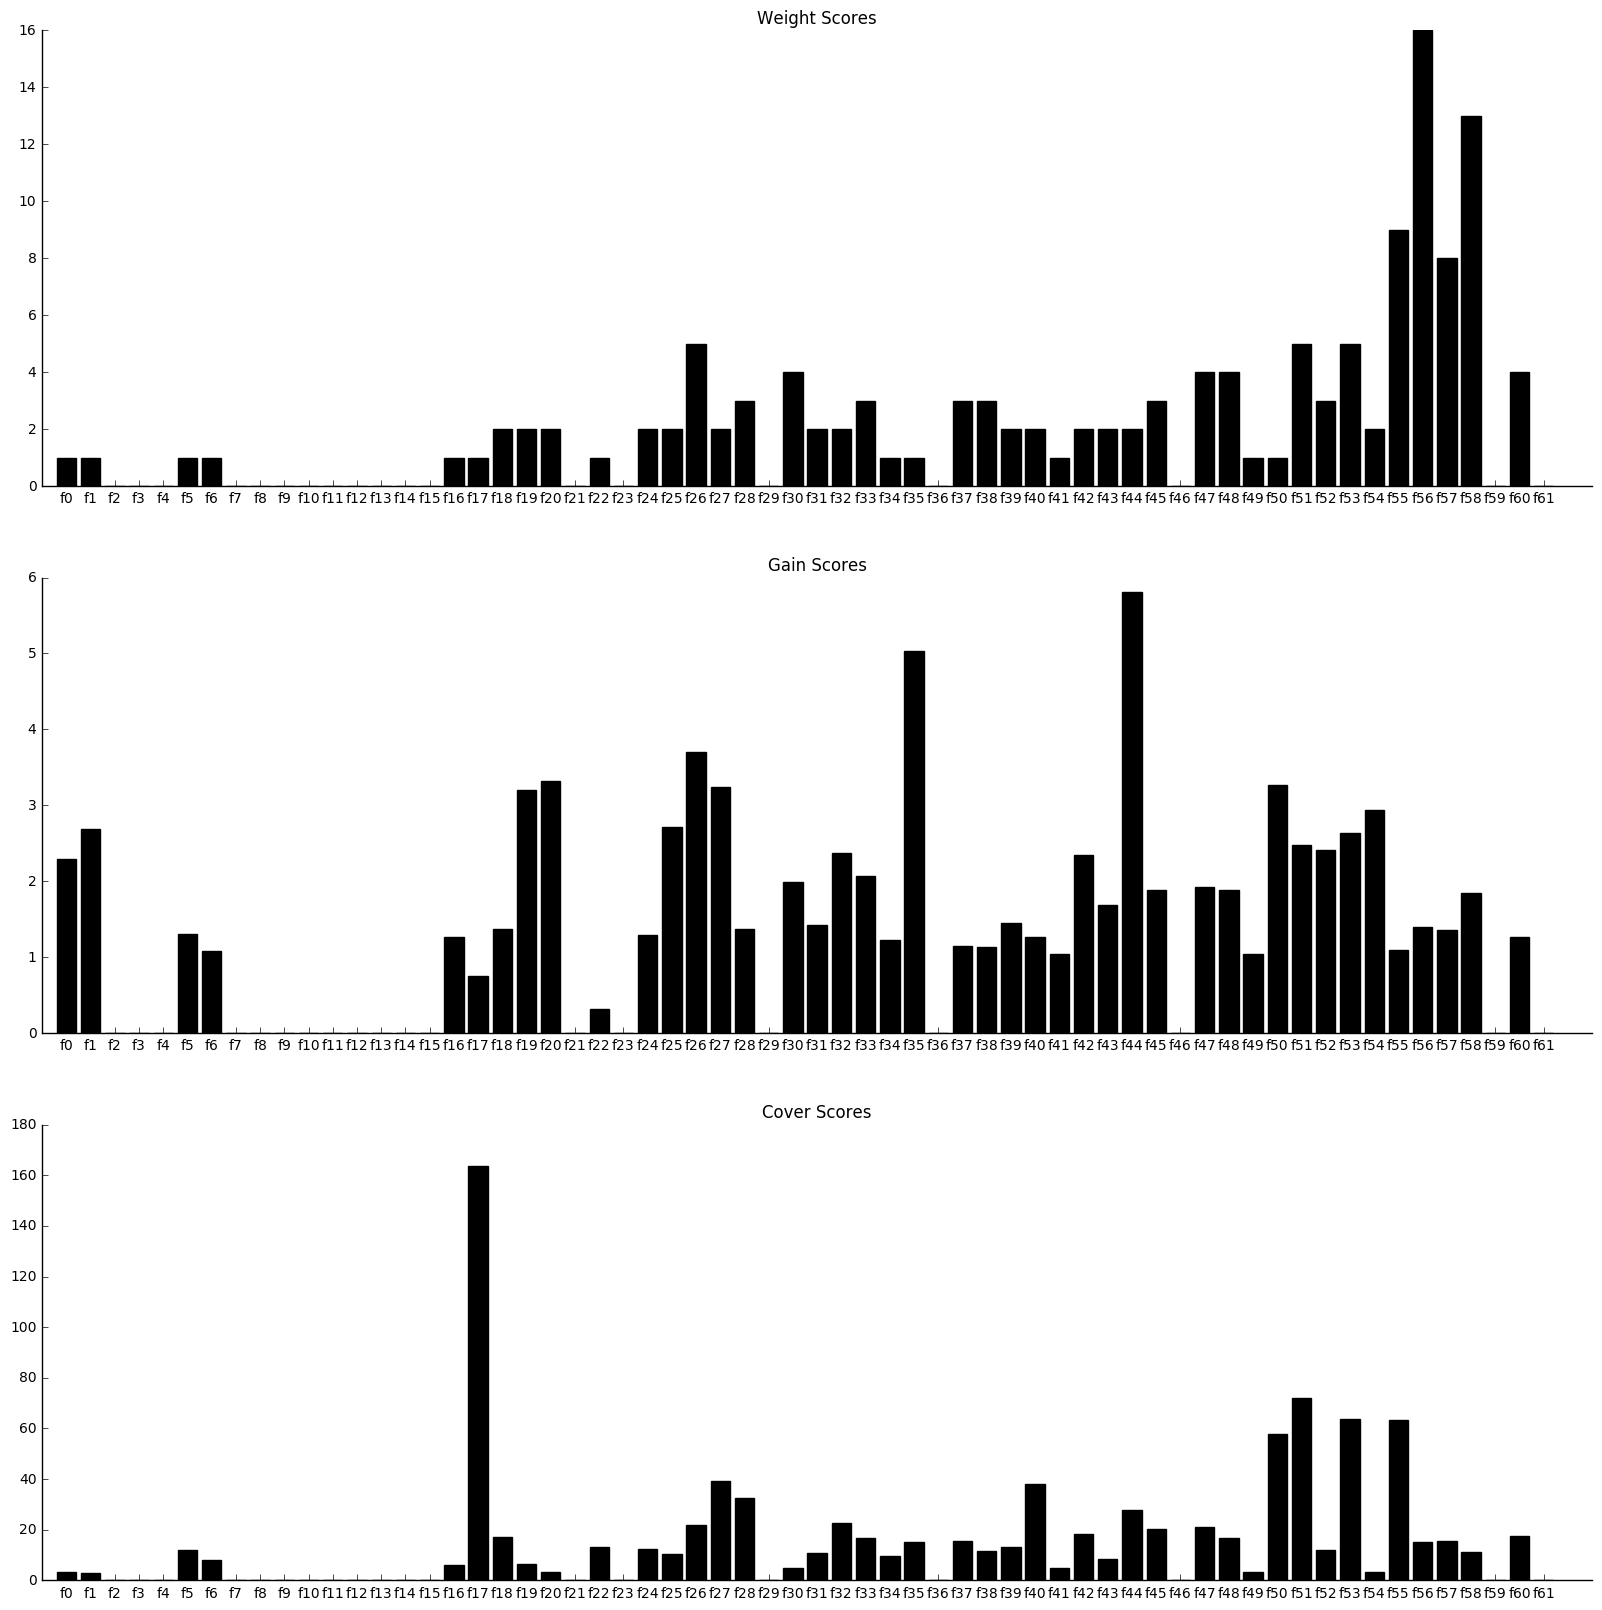

In [37]:
fig = plot_feature_importance(model)

In [ ]:
plot()